In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("university_admission.csv")
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [5]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [7]:
df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

<Axes: >

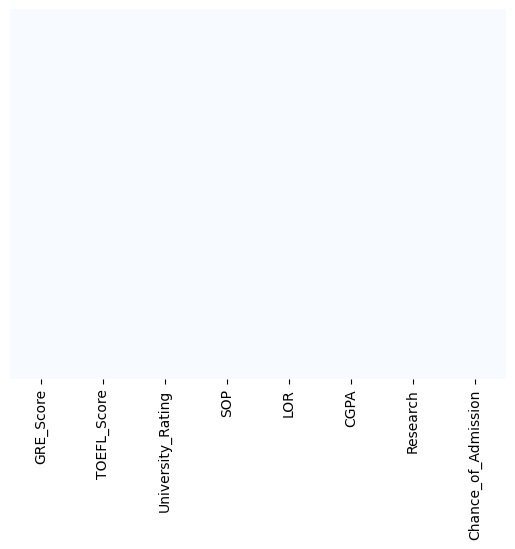

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

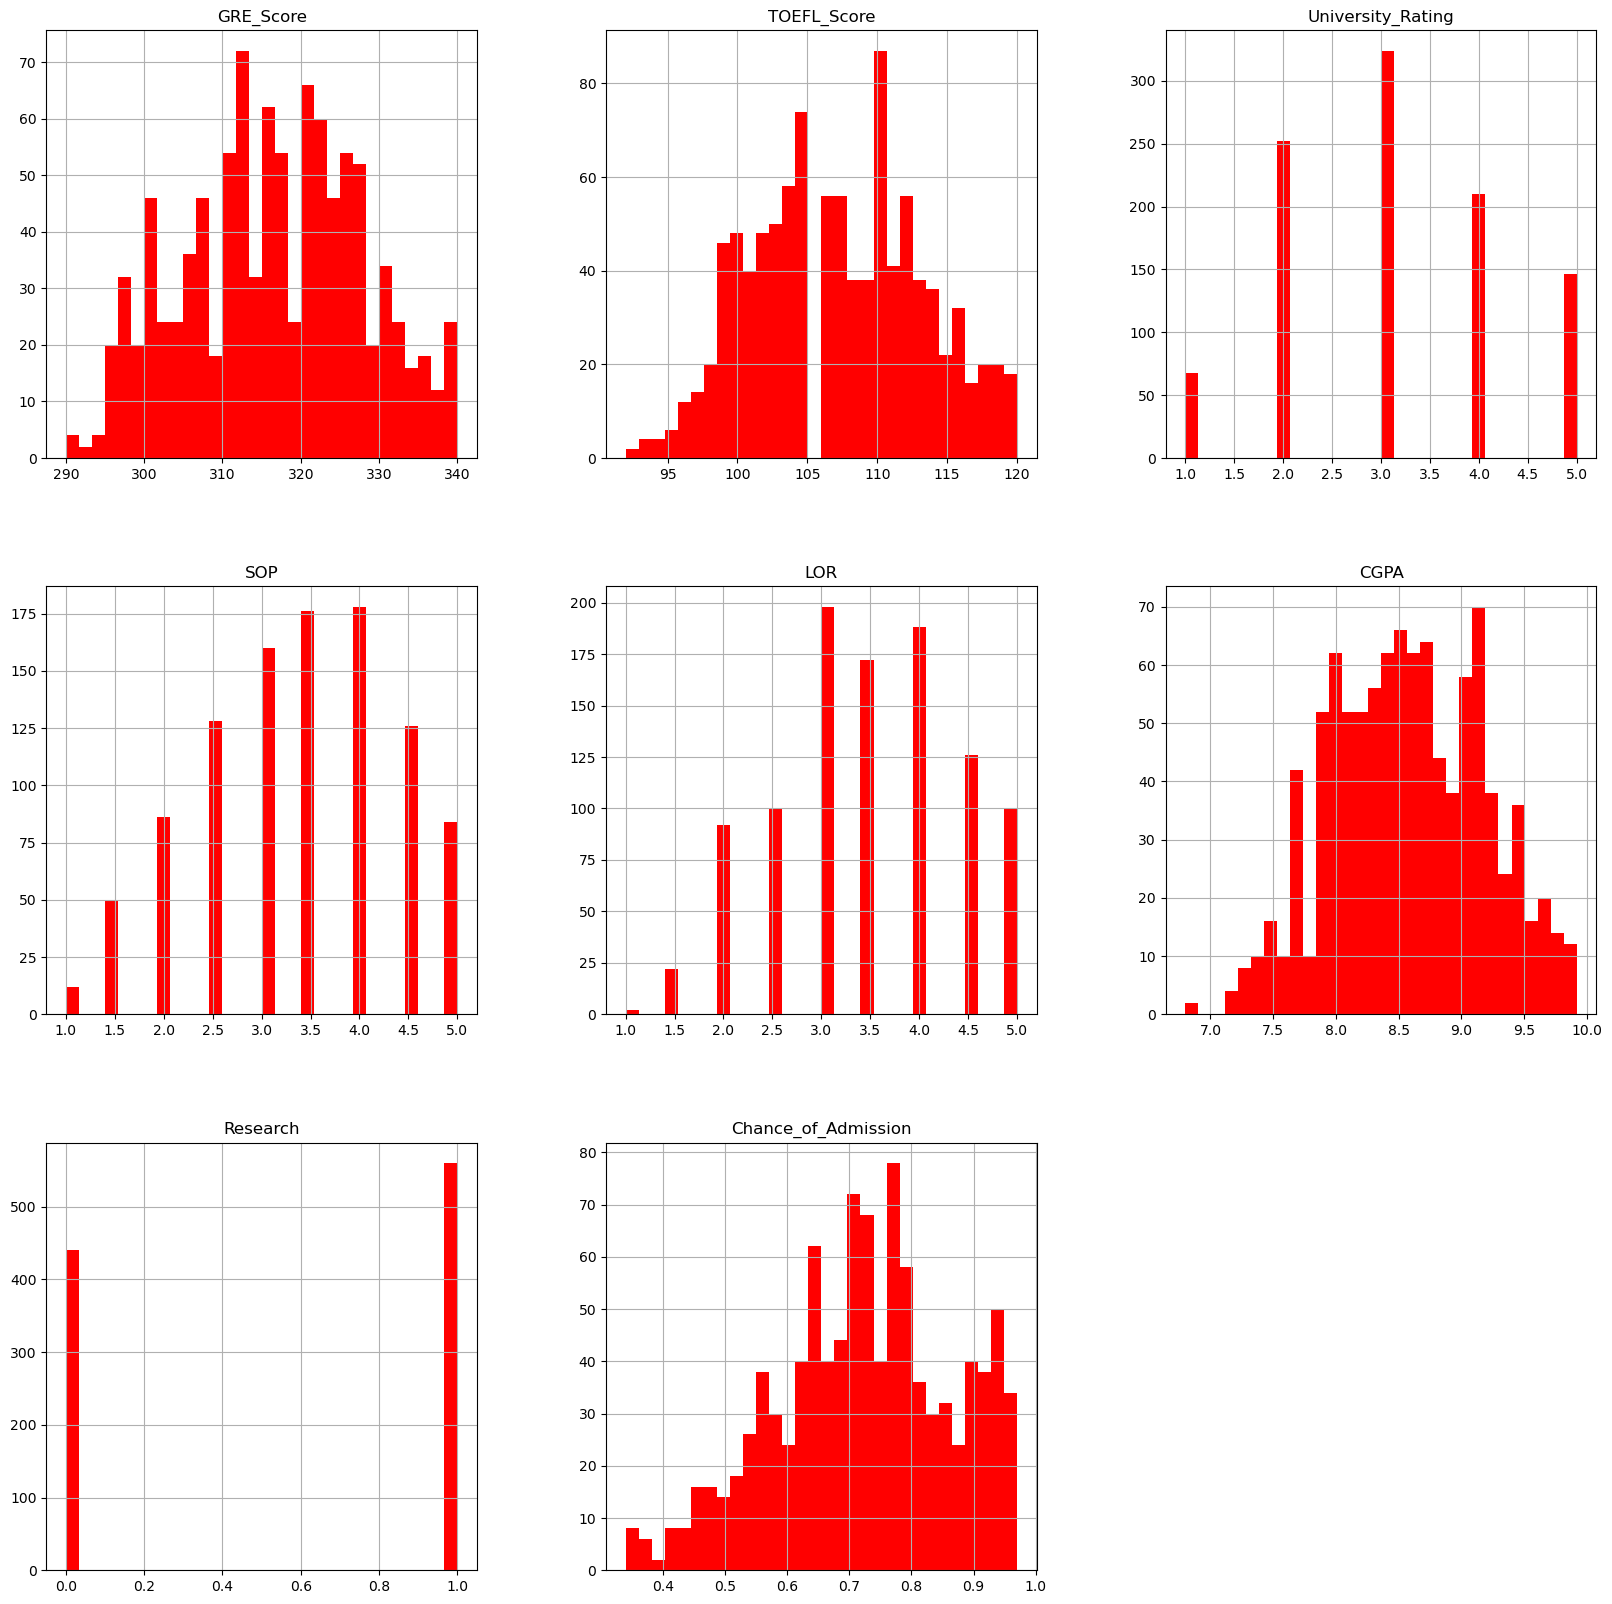

In [15]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

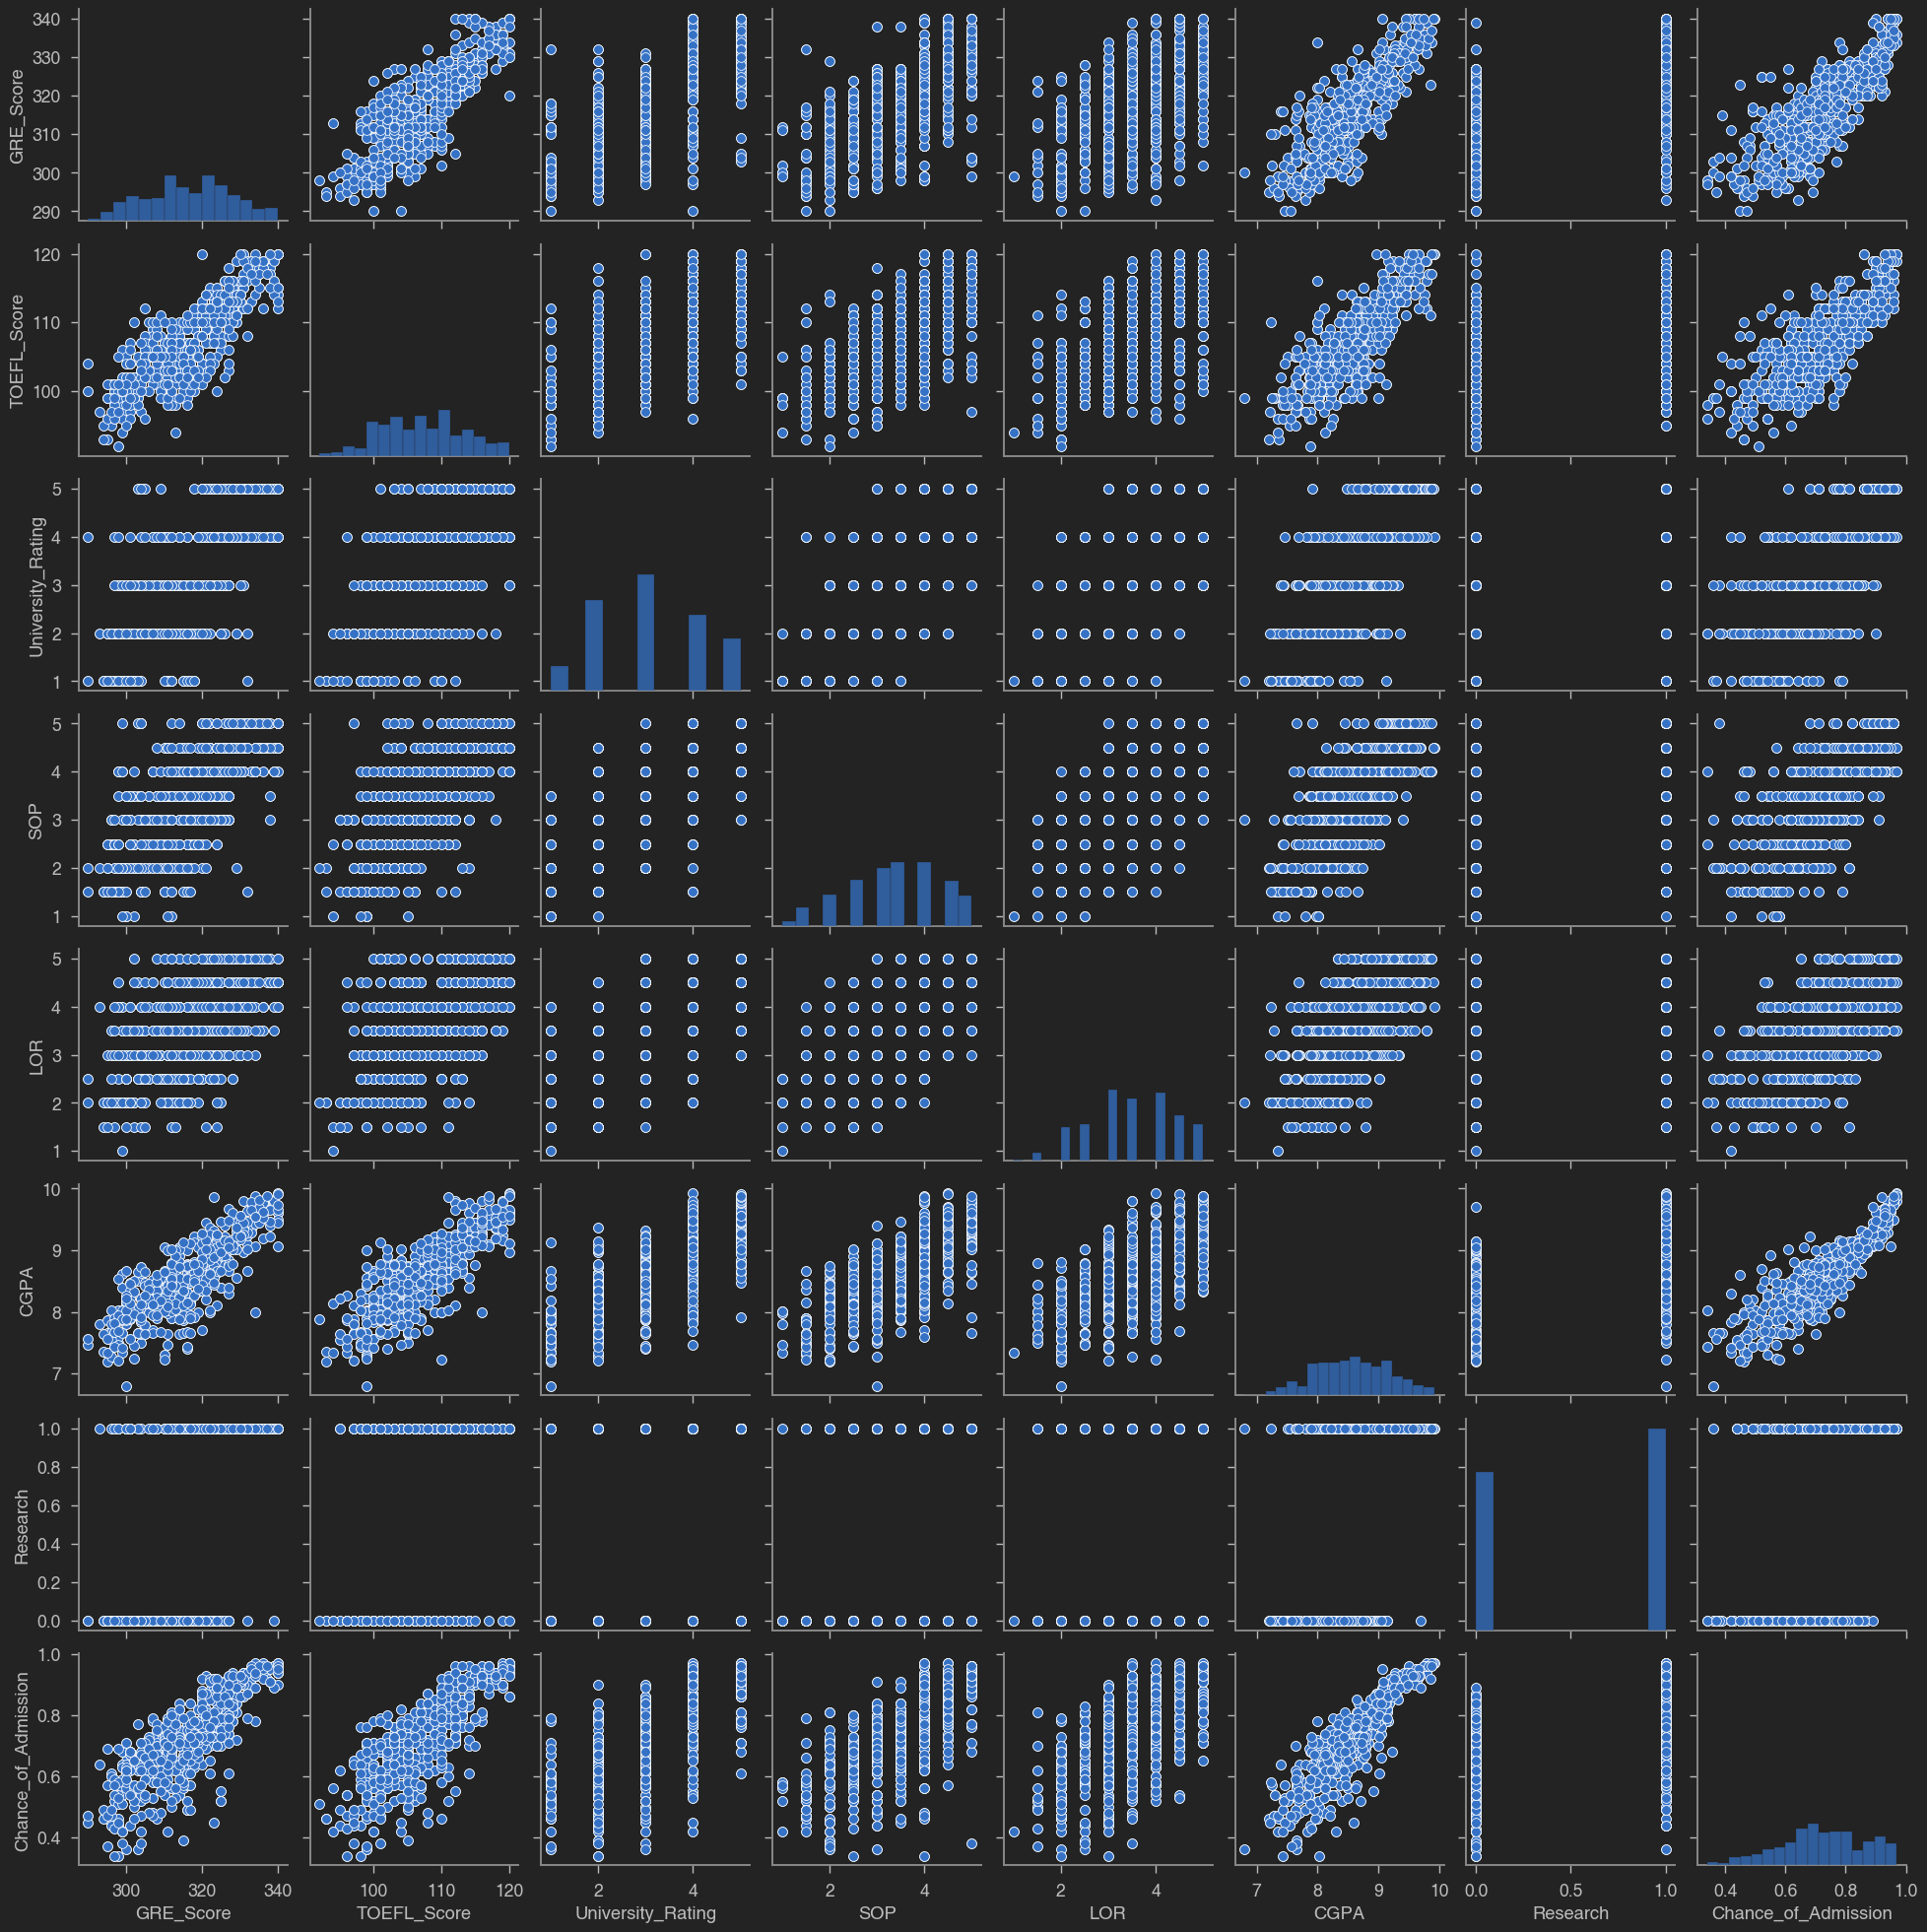

In [20]:
sns.pairplot(df)
plt.show()

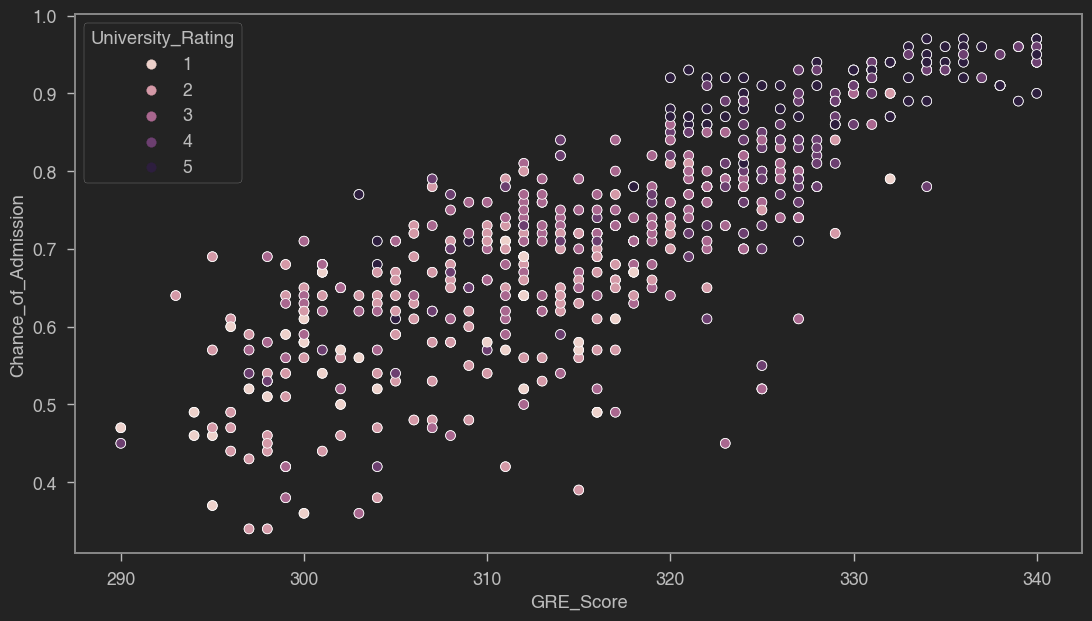

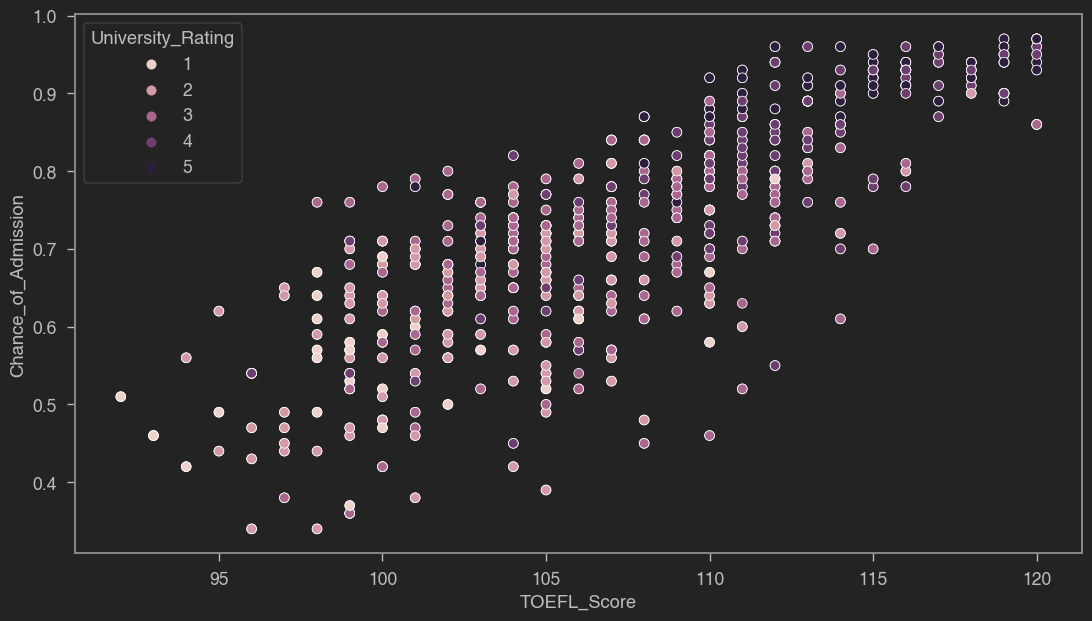

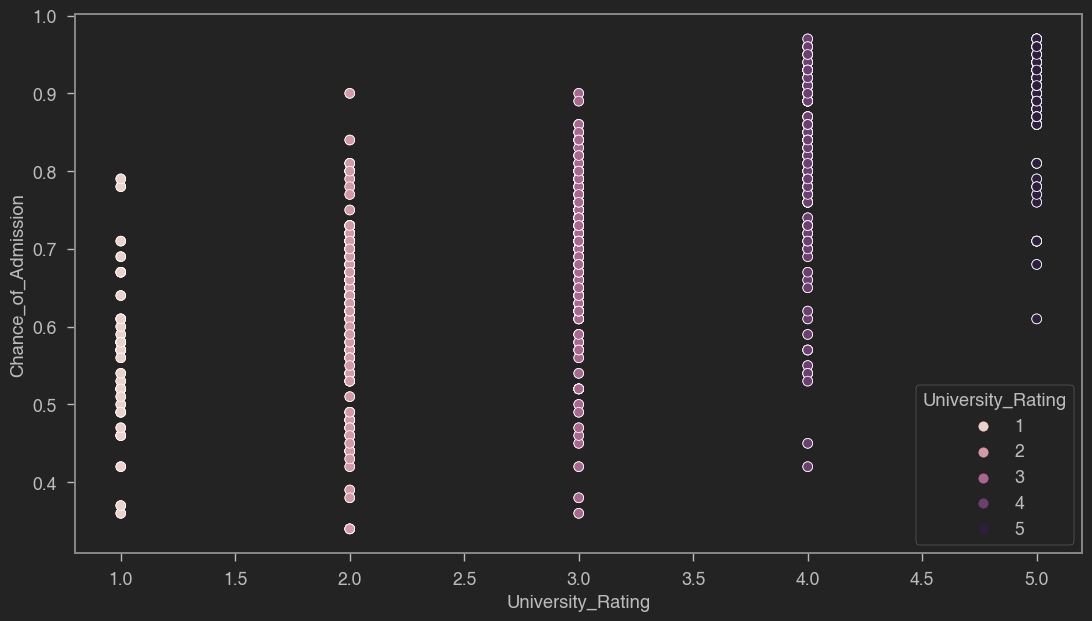

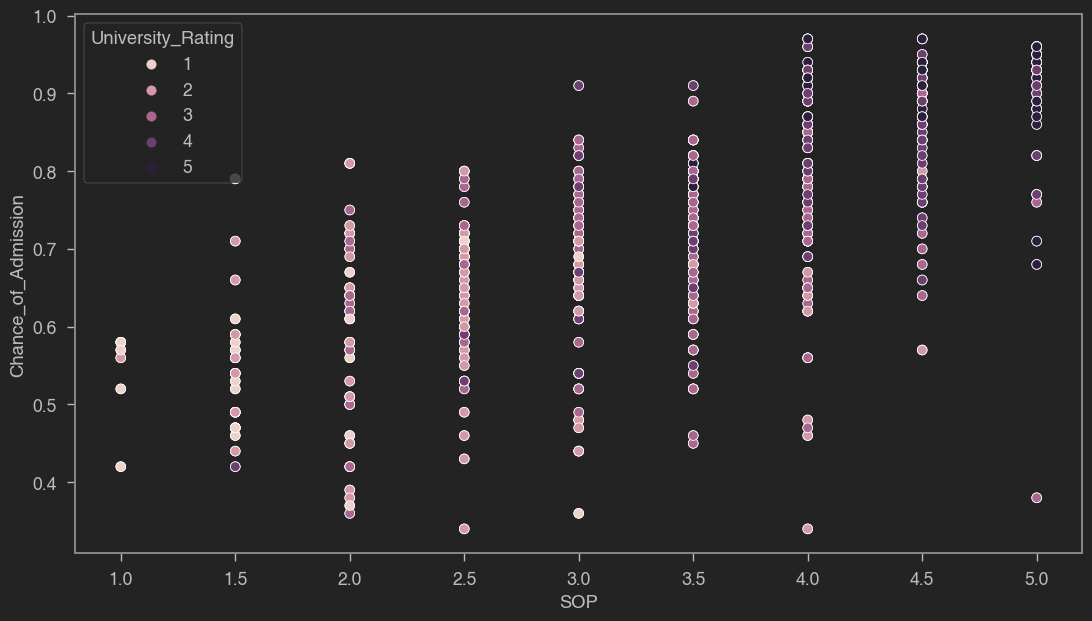

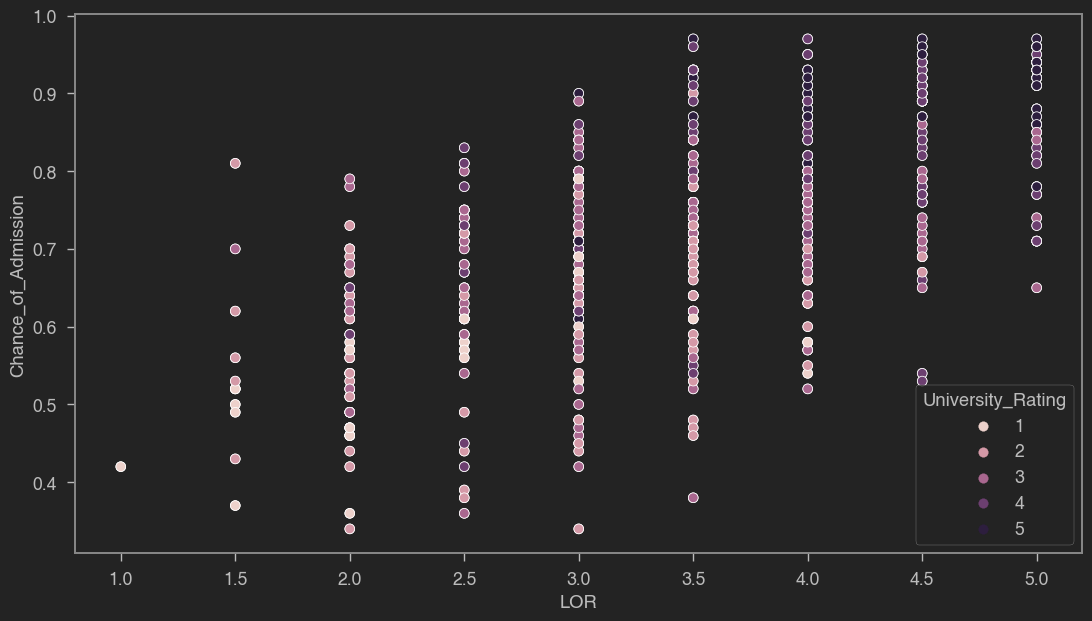

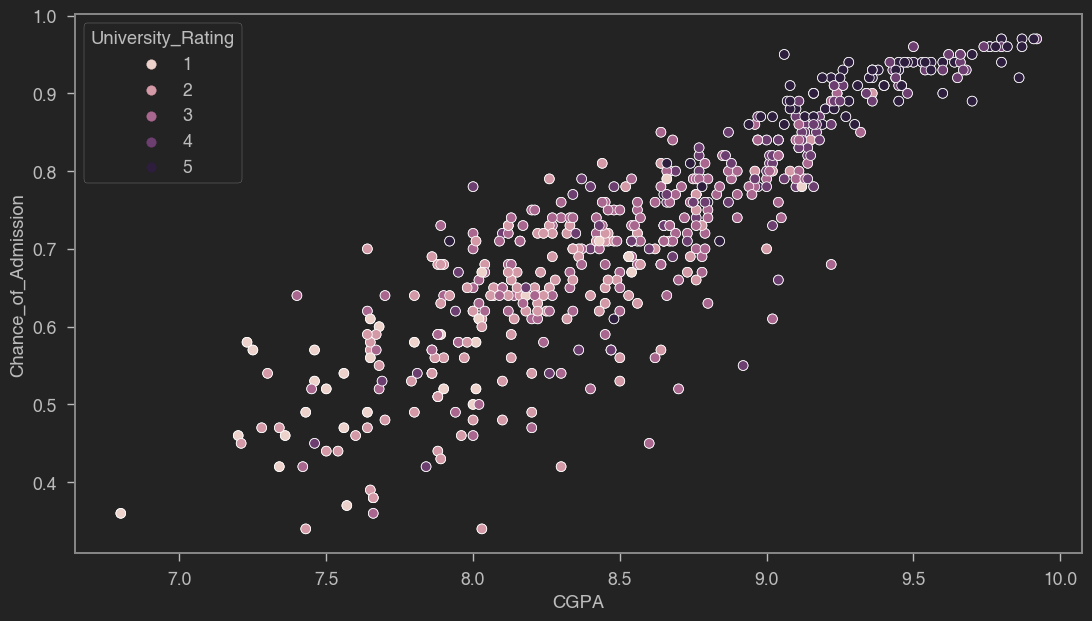

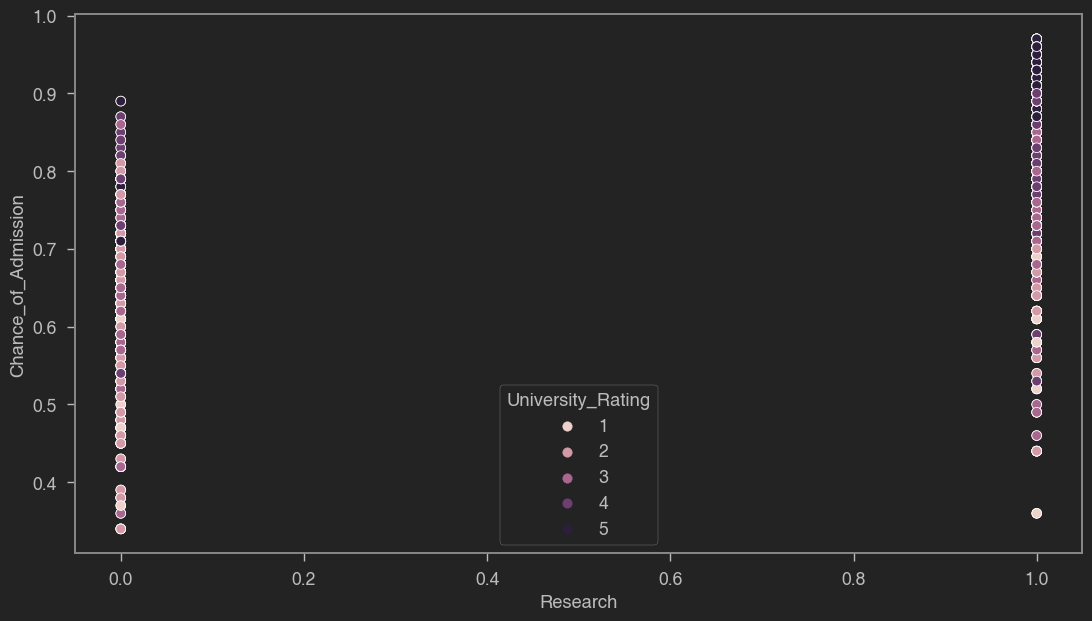

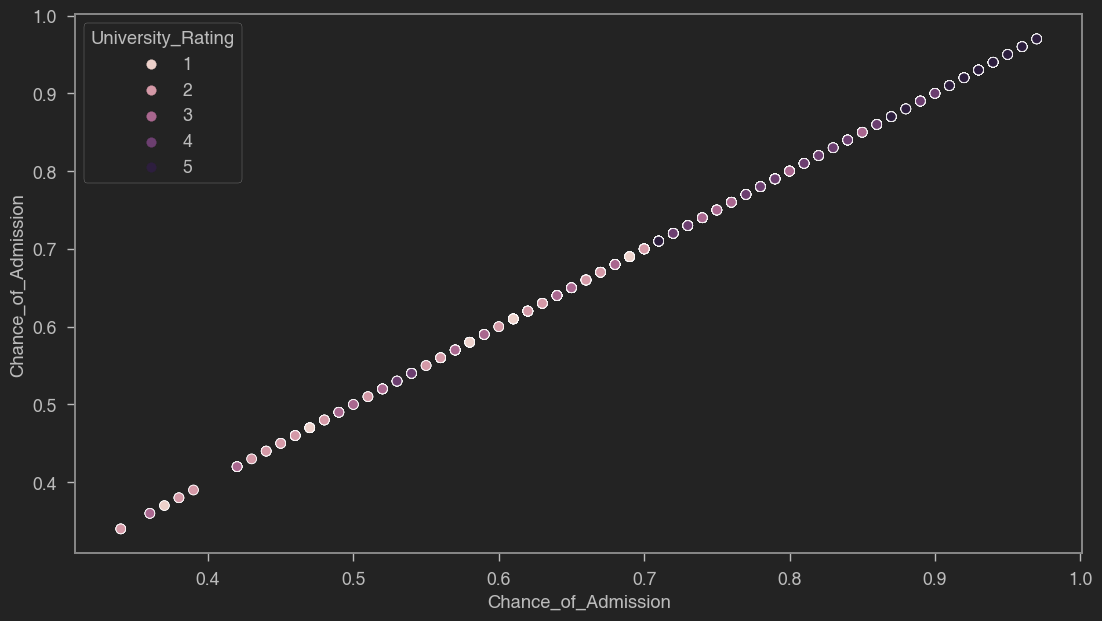

In [21]:
for col in df.columns:
    plt.figure(figsize = (13, 7))
    sns.scatterplot(x = col, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = df)
    plt.show()

In [24]:
X = df.drop(columns=['Chance_of_Admission'])
y = df['Chance_of_Admission']

In [25]:
X.shape

(1000, 7)

In [26]:
y.shape

(1000,)

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
y = y.reshape(-1, 1)
y.shape

(1000, 1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
X_train.shape

(700, 7)

In [34]:
X_test.shape

(300, 7)

In [35]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [36]:
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

NameError: name 'model' is not defined

In [37]:
y_predict = model.predict(X_test)

NameError: name 'model' is not defined

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

NameError: name 'y_predict' is not defined